In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random

# Opgave 1 *

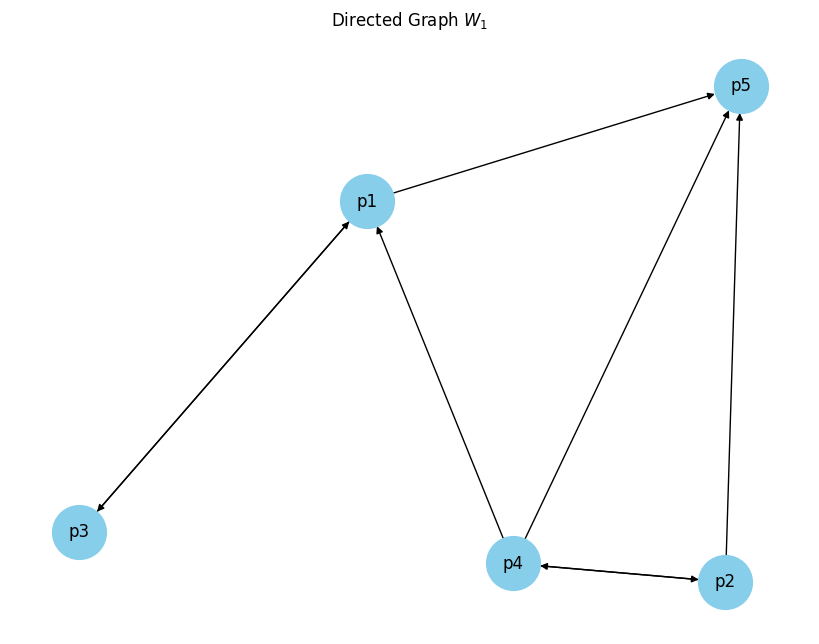

In [3]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 2 *

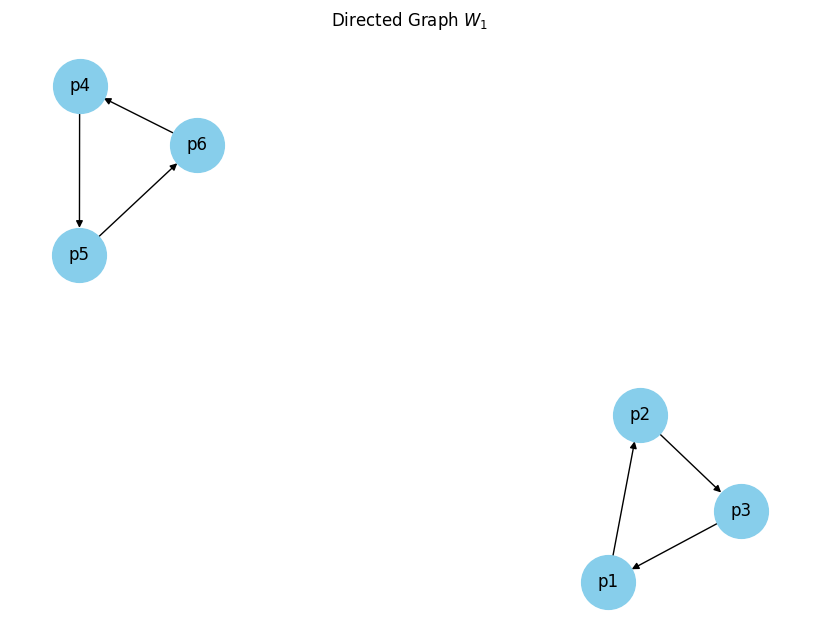

In [4]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 3 & 4 *

In [5]:


# Definition af netværket
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}

W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

def makeAdjacencyMatrix(W):
    nodes = list(W.keys())
    length = len(nodes)  
    
    output = np.zeros((length, length), dtype=int)
    
    node_index = {node: idx for idx, node in enumerate(nodes)}
    
    for i, node in enumerate(nodes):
        for neighbor in W[node]:
            j = node_index[neighbor]  
            output[i][j] = 1  
    
    return output

# Test function
print("W1")
print(makeAdjacencyMatrix(W1))
print("\nW2")
print(makeAdjacencyMatrix(W2))

W1
[[0 1 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

W2
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


# Opgave 5

In [6]:
def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(10,9,5))

{0: [7, 2, 3, 5, 1, 9, 8], 1: [2, 5, 7, 8, 6, 3], 2: [0, 1, 3, 7, 8, 6, 9, 4, 5], 3: [6, 0, 8, 2, 9, 5, 4, 7], 4: [0, 8, 7, 9, 1, 2, 6], 5: [7, 4, 0, 6, 3, 2], 6: [0, 7, 9, 4, 5, 8, 2, 1], 7: [5, 9, 8, 2, 6, 4, 0, 3], 8: [6, 5, 1, 2, 3], 9: [6, 3, 1, 5, 0, 4, 8, 7, 2]}


# Opgave 6 *

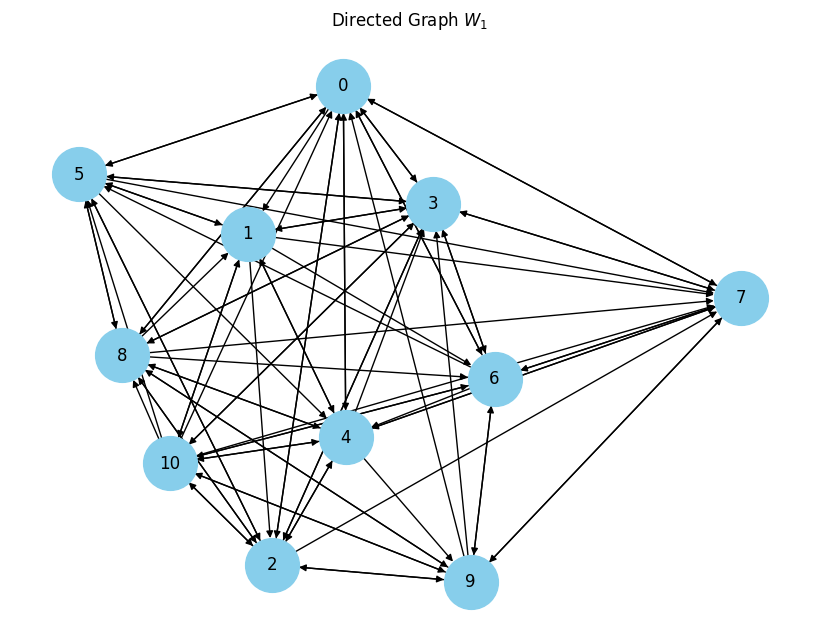

In [7]:
def visualize_graph(web):
    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf

    G = nx.DiGraph()

    for node, neighbors in web.items():
        for target in neighbors:
            G.add_edge(node, target)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
    plt.title("Directed Graph $W_1$")
    plt.show()

visualize_graph(make_web(11,10,5))